IMPORT LIBRARIES

In [2]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

IMPORT DATASET

In [3]:
df = pd.read_csv('emails.csv')
df.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [4]:
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


VISUALIZE DATA

In [6]:
ham  = df[df['spam'] == 0]
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [7]:
spam = df[df['spam'] == 1]
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [8]:
#percentage of spam
print("Spam percentage: ", (len(spam)/len(df))*100)
print("Ham percentage: ", (len(ham)/len(df))*100)

Spam percentage:  23.88268156424581
Ham percentage:  76.11731843575419


<AxesSubplot: xlabel='spam', ylabel='count'>

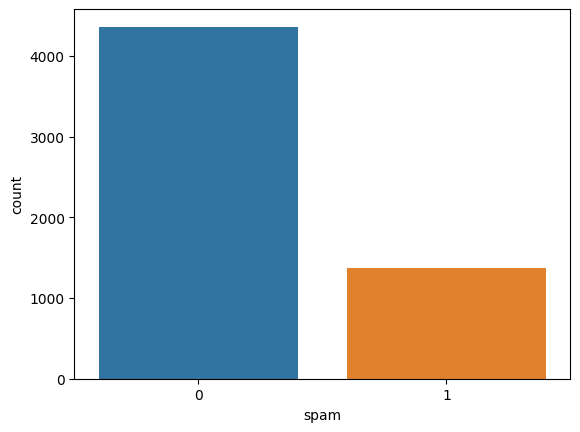

In [9]:
sns.countplot(data=df, x='spam')

CREATING TRAINING AND TESTING DATASETS

In [10]:
df.columns

Index(['text', 'spam'], dtype='object')

In [12]:
x = df['text']
y= df['spam']

In [13]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=101, train_size=0.6)

In [21]:
x_train.head()

4012    Subject: confirmation of 3 / 20 9 a . m . meet...
2807    Subject: replacement of stolen chairs  hi regg...
1786    Subject: performance  at this point , monday d...
658     Subject: request for assistance  barrister ade...
157     Subject: check this impotence medication  don ...
Name: text, dtype: object

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
vectorizer = CountVectorizer()
spamHam_vectorizer = vectorizer.fit_transform(x_train)

In [24]:
print(vectorizer.get_feature_names())

['00', '000', '0000', '00000000', '0000000000', '000000000003619', '000000000003991', '000000000003997', '000000000005168', '000000000005409', '000000000005411', '000000000005412', '000000000005413', '000000000006452', '000000000007494', '000000000007876', '000000000010552', '000000000011185', '000000000012734', '000000000012735', '000000000012738', '000000000013085', '000000000013287', '000000000015384', '000000000023619', '000000000024099', '000000000025307', '000000000025312', '000010220', '0000102317', '0000102374', '0000102789', '0000104281', '0000104282', '0000107043', '0000108729', '0001', '000166', '0002', '000202', '0003', '0004', '0005', '0006', '0009249480', '0009249481', '0009249504', '0009249505', '0009249506', '001', '0011', '0015', '002', '00225', '00235424', '00343938', '004', '0044', '00453', '005', '0052', '0054', '0057', '006', '0061', '007', '00971', '01', '0100', '0102', '0107', '01075', '0109', '011', '0110', '011000', '011601', '01210', '0125', '012501', '012601'

In [37]:
print(spamHam_vectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


TRAINING THE DATASET

In [32]:
labels = y_train.values

In [33]:
labels

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [27]:
from sklearn.naive_bayes import MultinomialNB

In [38]:
NB_classfier = MultinomialNB()
NB_classfier.fit(spamHam_vectorizer,labels)

MultinomialNB()

In [39]:
test_vectorizor = vectorizer.transform(x_test)

In [40]:
predict_y = NB_classfier.predict(test_vectorizor)

In [41]:
predict_y

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

EVALUATING THE MODEL

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

<AxesSubplot: >

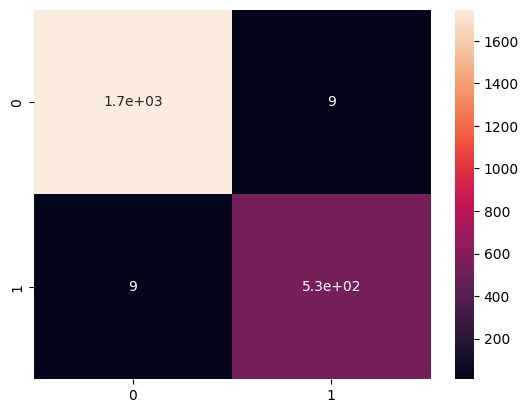

In [43]:
cm = confusion_matrix(y_test, predict_y)
sns.heatmap(data = cm, annot=True)

In [44]:
# to check the accuracy of the model
print(accuracy_score(y_test, predict_y))

0.9921465968586387


In [47]:
#printing the classification report 
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1755
           1       0.98      0.98      0.98       537

    accuracy                           0.99      2292
   macro avg       0.99      0.99      0.99      2292
weighted avg       0.99      0.99      0.99      2292

